In [9]:
! pip install pandas

In [10]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [1]:
!pip install keras

In [3]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
GPU is available


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEMSkQCEurHkNXh7tTXeIaGN1mRwXY9d3y8Up8YKmy0IVc1v8AQuPg
Mounted at /content/drive


# New Section

In [6]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Fruits_10/Train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Fruits_10/Test'

In [7]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG19",
# Here we will be using imagenet weights\n"
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights\n",
for layer in vgg.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Fruits_10/Train/*')
len(folders)

4

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [12]:
prediction=Dense(len(folders), activation='softmax')(x)

In [13]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Fruits_10/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2181 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Fruits_10/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 737 images belonging to 4 classes.


In [19]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
69/69 [==============================] - 628s 9s/step - loss: 0.2214 - accuracy: 0.9312 - val_loss: 0.0485 - val_accuracy: 0.9620
Epoch 2/3
69/69 [==============================] - 34s 487ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.0183 - val_accuracy: 0.9986
Epoch 3/3
69/69 [==============================] - 33s 478ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9946


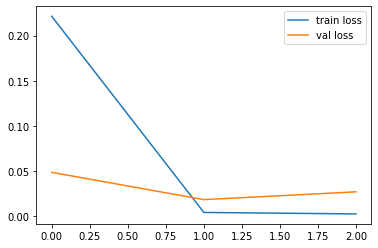

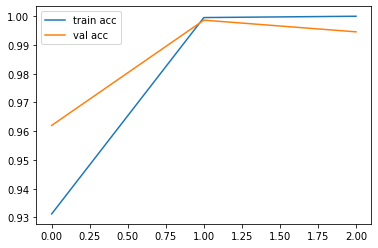

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('fruits_model_vgg19.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[1.39434502e-04, 5.49967028e-03, 2.35878815e-06, 9.94358480e-01],
       [1.72638640e-04, 1.58081262e-03, 1.22825020e-06, 9.98245358e-01],
       [2.17401466e-05, 9.99835134e-01, 1.81424130e-05, 1.24952916e-04],
       ...,
       [6.21285406e-04, 1.14530124e-01, 2.70699675e-05, 8.84821415e-01],
       [9.99510288e-01, 4.48376995e-05, 2.01574494e-06, 4.42862773e-04],
       [6.75644987e-05, 1.04141445e-03, 2.71097451e-06, 9.98888314e-01]],
      dtype=float32)

In [24]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 2, 2, 0, 2, 3, 1, 3, 0, 3, 3, 3, 2,
       2, 0, 3, 2, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 0, 3, 2, 1, 1, 3, 0, 0,
       3, 0, 3, 1, 2, 2, 1, 3, 3, 1, 0, 2, 2, 1, 1, 3, 3, 2, 2, 3, 0, 1,
       3, 2, 0, 2, 1, 2, 2, 1, 3, 2, 1, 0, 2, 2, 0, 2, 3, 1, 2, 1, 2, 1,
       3, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 3, 3, 3, 0, 3, 2, 3, 2, 1, 3,
       2, 0, 2, 3, 0, 3, 3, 3, 1, 2, 0, 1, 1, 3, 1, 0, 2, 1, 0, 3, 0, 1,
       3, 1, 2, 2, 3, 0, 3, 0, 1, 0, 3, 1, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 3, 1, 3, 0, 1, 1, 2, 3, 2, 3, 1, 3,
       1, 2, 3, 1, 3, 3, 0, 0, 3, 1, 2, 3, 2, 1, 0, 1, 3, 3, 2, 3, 3, 2,
       0, 3, 2, 2, 1, 2, 0, 3, 0, 2, 2, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3,
       2, 1, 2, 2, 3, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 3, 3, 1, 0, 2, 3, 3, 1, 0, 1, 0, 3, 2, 1, 0, 0,
       3, 3, 1, 1, 0, 2, 1, 0, 2, 1, 3, 2, 3, 0, 0, 2, 3, 2, 1, 3, 3, 2,
       1, 3, 2, 0, 2, 3, 0, 3, 0, 1, 1, 1, 1, 1, 3,

In [26]:
len(y_pred)

737

In [27]:
np.array(y_pred==0).sum()

166

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('fruits_model_vgg19.h5')

In [81]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/Fruits_10/Valid/kiwi.jpg',target_size=(224,224))


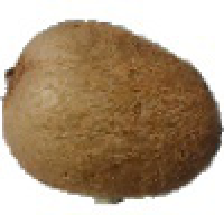

In [82]:
img

In [83]:
y=image.img_to_array(img)
y


array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [84]:
y.shape

(224, 224, 3)

In [85]:
y=np.expand_dims(y,axis=0)
y.shape

(1, 224, 224, 3)

In [86]:
imgy=preprocess_input(y)
imgy.shape

(1, 224, 224, 3)

In [87]:
imgy=imgy/255


In [88]:
preds= model.predict(imgy)
preds



array([[0.17168239, 0.8044607 , 0.00088493, 0.022972  ]], dtype=float32)

In [89]:
a=np.argmax(preds, axis=1)
a

array([1])

In [90]:
if(a==0):
    print("Dates")
elif(a==1):
    print("Kiwi")
elif(a==2):
  print('Lychee')
else:
  print('Walnut')

Kiwi
